<a href="https://colab.research.google.com/github/Alokathilakarathna/ME422_B3/blob/main/Vibration%20Lab/e20452.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Vibration Lab**
> ME 422 - Mechanical Systems Lab

> W.S.P.Y.J.C.YAPA (E/20/452)

# Activity 1 - Capture the first two dominant modes of small amplitude vibration of the system by a 2-dof freedom model

## Flexural Vibration of Beam

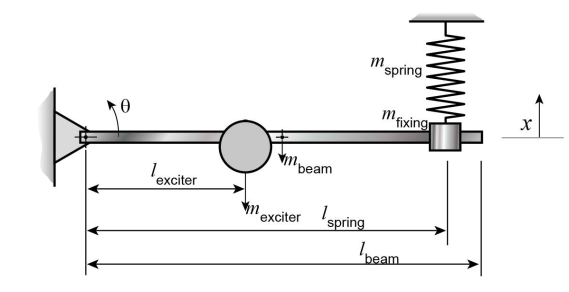

*Figure 01: Beam and Spring Setup*

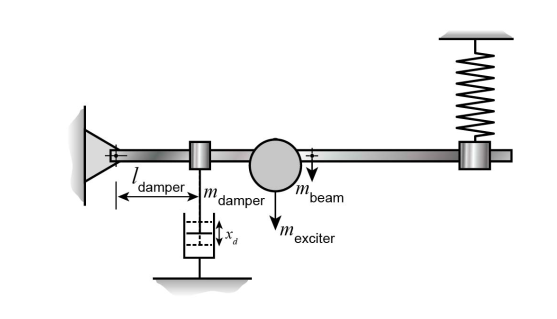

*Figure 02: Beam and Spring with Viscous Damping Setup*

### General Equation

When considering the flexural vibration of a beam, the vibration is in the “transverse” or “lateral” direction,
which is accompanied by bending (or flexure) of the member. Hence, the vibrations are perpen-
dicular to the main axis of the member. But a beam, unlike a string can support shear forces and bending moments at
its cross section.

The Bernoulli-Euler equation, which governs transverse vibration of thin beams, consider
a beam in bending, in the x-y plane, with x as the longitudinal axis and y as the transverse axis of
bending deflection.

Considering a small beam element of length δ𝓧 we can define the Bernoulli-Euler equation as follow.


$$
ρA \frac{∂ ^2 v(x,t)}{∂ t^2}
+ c \frac{∂  v(x,t)}{∂ t}
+ P \frac{\partial^2 v(x,t)}{\partial x^2}
+ \frac{∂^2}{∂ x^2} \left(EI \frac{∂^2 v(x,t)}{∂ x^2}\right)
= f(x,t)
$$

ρ : mass density of the beam material $kg/m^3$

A : cross-sectional area of the beam $m^2$

E : Young's modulus of the beam material $N/m^2$

I : second moment of area of the beam cross-section $m^4$

c : viscous damping coefficient per unit length $N \cdot s/m^2$

v(x,t) : transverse displacement of the beam at position $x$ and time $t$ $m$

f(x,t) : distributed transverse force per unit length acting on the beam $N/m$


### Equation for Experimental Setup


Considering the specific setup the damper and the exiter are in localized points,

$$
\rho A \frac{\partial^2 v(x,t)}{\partial t^2}
+ EI \frac{\partial^4 v(x,t)}{\partial x^4}
+ c\ \delta(x-l_d) \frac{\partial v(x,t)}{\partial t}
=
F_e\sin(ω_e t)\,\delta(x-l_e)\tag{1}
$$

ρ : mass density of the beam material $kg/m^3$

A : cross-sectional area of the beam $m^2$

E : Young's modulus of the beam material $N/m^2$

I : second moment of area of the beam cross-section $m^4$

v(x,t) : transverse displacement of the beam at position $x$ and time $t$ $m$

EI : flexural rigidity of the beam $N\cdot m^2$

c : viscous damping coefficient of the dashpot $N\cdot s/m$

l_d : position of the dashpot measured from the reference end of the beam $m$

$F_e$ : amplitude of harmonic point force $N$

$ω_e$ : forcing angular frequency $rad/s$

l_e : position of the exciter (point force location) measured from the reference end $m$

δ(x-l) : Dirac delta function (represents a force/damper applied at a single point)



## Assume Free Vibration and Undamped Conditions

Assume free vibration conditions
$$F_e\sin(ω_e t)\,\delta(x-l_e) = 0$$

Assuming undamped conditions
$$ c= 0$$
Assuming the beam is uniform throught x,
$$ EI = contant $$


Therefore from (1),

$$
ρA \frac{∂ ^2 v(x,t)}{∂ t^2}
+ EI \frac{∂^4 v(x,t)}{∂ x^4}
= 0
\tag{2}
$$



## Modal Analysis


In each mode, the system will vibrate in a fixed shape ratio. Therefore, the time and space functions
can be separable for a modal motion,

Assume solution for $v(x,t)$, is in form of,

$$v(x,t) = Y(x) . q(t) \tag{3}$$


$Y(x)$ - Eigen Function/ Mode shape

$q(t)$ - Generalized Corrdinate

Computing partial derivatives of $v(x,t)$


Velocity (First time derivative):
$$\frac{\partial v(x,t)}{\partial t} = Y(x) \dot{q}(t)$$

Acceleration (Second time derivative):
$$\frac{\partial^2 v(x,t)}{\partial t^2} = Y(x) \ddot{q}(t)$$

Beam Curvature/Flexure (Fourth spatial derivative):
$$\frac{\partial^4 v(x,t)}{\partial x^4} = \frac{d^4 Y(x)}{dx^4} q(t) = Y''''(x) q(t)$$


Substitute these derivatives back into the governing equation (2)

$$\rho A . Y(x) \ddot{q}(t) + EI. Y''''(x) q(t) = 0 \tag{4}$$


### Variable Seperation



To separate the variables, divide the entire equation (4) by $ρA. Y(x) q(t)$,

$$\frac{\ddot{q}(t)}{q(t)} +  \frac{EI}{\rho A} \frac{Y''''(x)}{Y(x)} = 0$$

by rearranging the terms to place all $x$-dependent terms on one side and all $t$-dependent terms on the other,

$$
\frac{EI}{\rho A} \frac{Y''''(x)}{Y(x)}
= -\frac{\ddot{q}(t)}{q(t)}
$$

Since the left side depends only on space ($x$) and the right side depends only on time ($t$), both sides must be equal to a constant.

For harmonic vibrations, take this seperation constant as $\omega^2$ (where $\omega$ represents the natural frequency),

$$
\frac{EI}{\rho A} \frac{Y''''(x)}{Y(x)}
=  -\frac{\ddot{q}(t)}{q(t)}
= \omega^2 \tag{5}
$$


Equation (5) yields two ordinary differential equations,

**Temporal Equation (Time Response):**
$$\ddot{q}(t) + \omega^2 q(t) = 0 \tag{6}$$

**Spatial Equation (Mode Shape)**
$$\frac{EI}{\rho A} Y''''(x) - \omega^2 Y(x) = 0$$

$$Y''''(x) - \frac{\rho A \omega^2}{EI} Y(x) = 0 \tag{7}$$

Rewite this as,
$$Y''''(x) - λ^4 Y(x) = 0 \tag{8}$$

Taking,
$$ λ^4 = \frac{ρAω^2}{EI}$$

Then Nat
$$ ω = λ^2 \sqrt{\frac{EI}{ρA}} \tag{9}$$

Therefore we can see that natural requancy of the system independent of damping





### General Solution

sdfs